In [3]:
#Importing the packages
import numpy as np
import pandas as pd

#loading the dataset

file_path = "SubstanceHarmsData.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info(), df.head()

/Users/nyadual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nyadual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Substance         27909 non-null  object
 1   Source            27909 non-null  object
 2   Specific_Measure  27909 non-null  object
 3   Type_Event        27909 non-null  object
 4   Region            27909 non-null  object
 5   PRUID             27909 non-null  int64 
 6   Time_Period       27909 non-null  object
 7   Year_Quarter      27909 non-null  object
 8   Aggregator        20284 non-null  object
 9   Disaggregator     20284 non-null  object
 10  Unit              27909 non-null  object
 11  Value             23910 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


(None,
   Substance  Source Specific_Measure                             Type_Event  \
 0   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 1   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 2   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 3   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 4   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 
    Region  PRUID Time_Period Year_Quarter Aggregator Disaggregator  \
 0  Canada      1     By year         2016        NaN           NaN   
 1  Canada      1     By year         2017        NaN           NaN   
 2  Canada      1     By year         2018        NaN           NaN   
 3  Canada      1     By year         2019        NaN           NaN   
 4  Canada      1     By year         2020        NaN           NaN   
 
          Unit Value  
 0  Crude rate   7.8  
 1  Crude rate  10.7  
 2  Crude rate

In [17]:
#Data cleaning and wrangling

# Convert 'Value' column to numeric, forcing errors to NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows where 'Value' is missing since they are not useful for numerical analysis
df_cleaned = df.dropna(subset=['Value'])

# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['Aggregator', 'Disaggregator']
df_cleaned.loc[:, categorical_columns] = df_cleaned[categorical_columns].fillna('Unknown')

# Standardize column names for easier referencing
df_cleaned.columns = df_cleaned.columns.str.lower()

# Reset index after cleaning
df_cleaned = df_cleaned.reset_index(drop=True)

# Display cleaned data
df_cleaned


,substance,source,specific_measure,type_event,region,pruid,time_period,year_quarter,aggregator,disaggregator,unit,value
0,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2016,Unknown,Unknown,Crude rate,7.8
1,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2017,Unknown,Unknown,Crude rate,10.7
2,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2018,Unknown,Unknown,Crude rate,11.4
3,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2019,Unknown,Unknown,Crude rate,9.9
4,Opioids,Deaths,Overall numbers,Total apparent opioid toxicity deaths,Canada,1,By year,2020,Unknown,Unknown,Crude rate,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...
21066,Stimulants,Emergency Department (ED) Visits,Age group by sex,Intentional stimulant-related poisoning ED visits,Canada,1,By year,2016,40 to 49 years,Male,Number,50.0
21067,Stimulants,Emergency Department (ED) Visits,Age group by sex,Intentional stimulant-related poisoning ED visits,Canada,1,By year,2016,50 to 59 years,Female,Number,22.0
21068,Stimulants,Emergency Department (ED) Visits,Age group by sex,Intentional stimulant-related poisoning ED visits,Canada,1,By year,2016,50 to 59 years,Male,Number,29.0
21069,Stimulants,Emergency Department (ED) Visits,Age group by sex,Intentional stimulant-related poisoning ED visits,Canada,1,By year,2016,60 years or more,Female,Number,7.0


In [18]:
# Save the cleaned dataset
cleaned_file_path = "cleanedSubstancesData.csv"
df.to_csv(cleaned_file_path, index=False)

# Confirm saved file path
cleaned_file_path
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27909 entries, 0 to 27908
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Substance         27909 non-null  object 
 1   Source            27909 non-null  object 
 2   Specific_Measure  27909 non-null  object 
 3   Type_Event        27909 non-null  object 
 4   Region            27909 non-null  object 
 5   PRUID             27909 non-null  int64  
 6   Time_Period       27909 non-null  object 
 7   Year_Quarter      27909 non-null  object 
 8   Aggregator        20284 non-null  object 
 9   Disaggregator     20284 non-null  object 
 10  Unit              27909 non-null  object 
 11  Value             21071 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 2.6+ MB


(None,
   Substance  Source Specific_Measure                             Type_Event  \
 0   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 1   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 2   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 3   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 4   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
 
    Region  PRUID Time_Period Year_Quarter Aggregator Disaggregator  \
 0  Canada      1     By year         2016        NaN           NaN   
 1  Canada      1     By year         2017        NaN           NaN   
 2  Canada      1     By year         2018        NaN           NaN   
 3  Canada      1     By year         2019        NaN           NaN   
 4  Canada      1     By year         2020        NaN           NaN   
 
          Unit  Value  
 0  Crude rate    7.8  
 1  Crude rate   10.7  
 2  Crude r

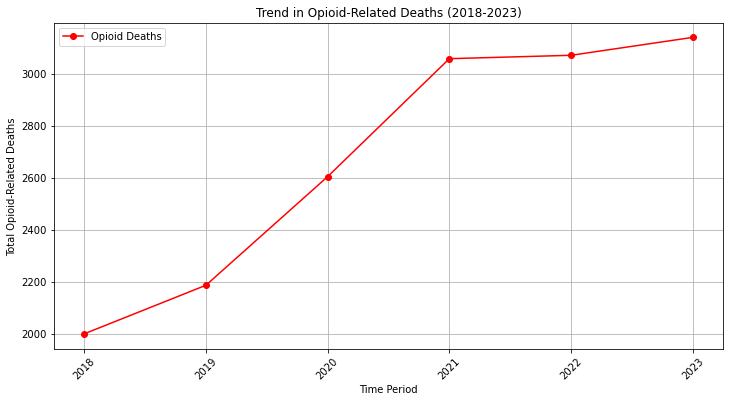

In [39]:
#Start the data analysis process

#Q1 What is the trend in opioid and substances-related deaths from 2016 -2023
#(omitting 2024 since the data is incomplete)
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Ensure 'Value' column exists (replace 'Value' with the correct column name if needed)
value_column = "Value"  # Change this if the actual column is different

# Filter data for opioid-related deaths (2018-2023) using 'Time_Period'
df_filtered = df[df['Time_Period'].str.contains('2018|2019|2020|2021|2022|2023', na=False)]
df_filtered = df_filtered[df_filtered['Substance'] == 'Opioids']

# Convert 'Time_Period' to numeric for sorting
df_filtered["Time_Period"] = pd.to_numeric(df_filtered["Time_Period"], errors="coerce")

# Remove NaN values (if any exist after conversion)
df_filtered = df_filtered.dropna(subset=["Time_Period"])

# Aggregate data by Time_Period (sum opioid deaths per time period)
df_trend = df_filtered.groupby('Time_Period')[value_column].sum().reset_index()

# Sort by Time_Period
df_trend = df_trend.sort_values(by='Time_Period')

# Convert Time_Period to NumPy before plotting to prevent errors
time_periods = df_trend['Time_Period'].to_numpy()
death_counts = df_trend[value_column].to_numpy()  # ✅ Convert before using

# Plot the trend using a line chart
plt.figure(figsize=(12, 6))
plt.plot(time_periods, death_counts, marker='o', linestyle='-', color='red', label='Opioid Deaths')

# Formatting
plt.xlabel("Time Period")
plt.ylabel("Total Opioid-Related Deaths")
plt.title("Trend in Opioid-Related Deaths (2018-2023)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.legend()

# Show plot
plt.show()


/var/folders/xx/jgs6rx313ns92c4ktszn3bp80000gn/T/ipykernel_56464/312373340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opioids["Time_Period"] = pd.to_numeric(df_opioids["Time_Period"], errors="coerce")
/var/folders/xx/jgs6rx313ns92c4ktszn3bp80000gn/T/ipykernel_56464/312373340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stimulants["Time_Period"] = pd.to_numeric(df_stimulants["Time_Period"], errors="coerce")


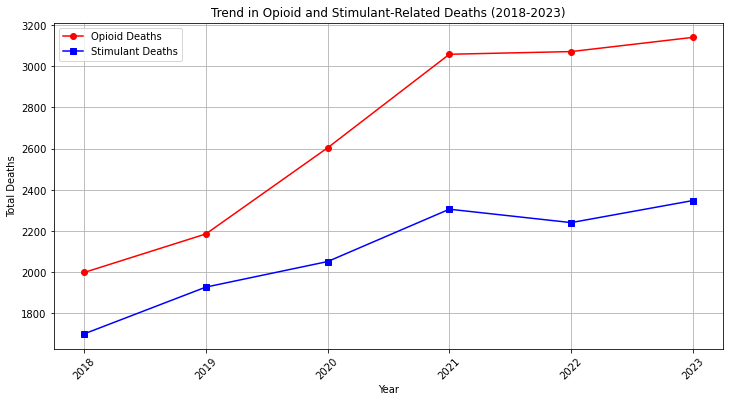

In [40]:
import matplotlib.pyplot as plt

# Ensure 'Value' column exists (replace 'Value' with the correct column name if needed)
value_column = "Value"  # Change this if the actual column is different

# Filter data for opioid- and stimulant-related deaths (2018-2023) using 'Time_Period'
df_filtered = df[df['Time_Period'].str.contains('2018|2019|2020|2021|2022|2023', na=False)]
df_opioids = df_filtered[df_filtered['Substance'] == 'Opioids']
df_stimulants = df_filtered[df_filtered['Substance'] == 'Stimulants']

# Convert 'Time_Period' to numeric for sorting
df_opioids["Time_Period"] = pd.to_numeric(df_opioids["Time_Period"], errors="coerce")
df_stimulants["Time_Period"] = pd.to_numeric(df_stimulants["Time_Period"], errors="coerce")

# Remove NaN values (if any exist after conversion)
df_opioids = df_opioids.dropna(subset=["Time_Period"])
df_stimulants = df_stimulants.dropna(subset=["Time_Period"])

# Aggregate data by Time_Period (sum deaths per time period)
df_trend_opioids = df_opioids.groupby('Time_Period')[value_column].sum().reset_index()
df_trend_stimulants = df_stimulants.groupby('Time_Period')[value_column].sum().reset_index()

# Sort by Time_Period
df_trend_opioids = df_trend_opioids.sort_values(by='Time_Period')
df_trend_stimulants = df_trend_stimulants.sort_values(by='Time_Period')

# Convert Time_Period to NumPy before plotting to prevent errors
time_periods_opioids = df_trend_opioids['Time_Period'].to_numpy()
death_counts_opioids = df_trend_opioids[value_column].to_numpy()

time_periods_stimulants = df_trend_stimulants['Time_Period'].to_numpy()
death_counts_stimulants = df_trend_stimulants[value_column].to_numpy()

# Plot the trend using a line chart for both opioids and stimulants
plt.figure(figsize=(12, 6))
plt.plot(time_periods_opioids, death_counts_opioids, marker='o', linestyle='-', color='red', label='Opioid Deaths')
plt.plot(time_periods_stimulants, death_counts_stimulants, marker='s', linestyle='-', color='blue', label='Stimulant Deaths')

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Trend in Opioid and Stimulant-Related Deaths (2018-2023)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.legend()

# Show plot
plt.show()


/var/folders/xx/jgs6rx313ns92c4ktszn3bp80000gn/T/ipykernel_83526/793378957.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



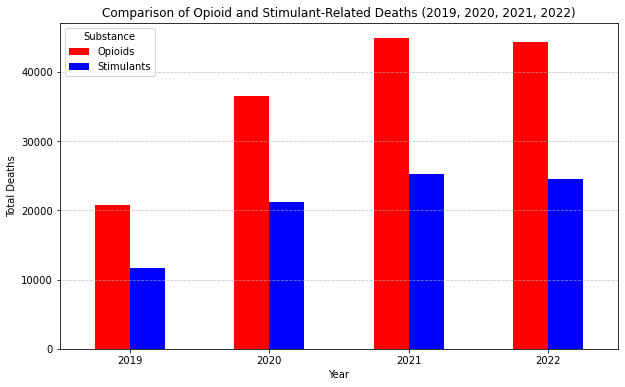

In [21]:
# Reload the dataset
file_path = "cleanedSubstancesData.csv"
df_new = pd.read_csv(file_path)

# Ensure column names are stripped of any leading/trailing spaces
df_new.columns = df_new.columns.str.strip()

# Define selected years for comparison
selected_years = ["2019", "2020", "2021", "2022"]

# Ensure 'Year_Quarter' is a string before slicing
df_new['Year_Quarter'] = df_new['Year_Quarter'].astype(str)

# Filter data for "By year" and the selected years
df_selected_years = df_new[
    (df_new['Time_Period'] == "By year") & 
    (df_new['Year_Quarter'].str[:4].isin(selected_years)) & 
    (df_new['Source'] == "Deaths") & 
    (df_new['Unit'] == "Number")
]

# Convert 'Year_Quarter' to extract only the year
df_selected_years['Year'] = df_selected_years['Year_Quarter'].str[:4].astype(int)

# Aggregate total deaths by year and substance type
df_bar_chart_data = df_selected_years.groupby(['Year', 'Substance'])['Value'].sum().unstack().fillna(0)

# Plot bar chart comparing opioid and stimulant-related deaths in selected years
plt.figure(figsize=(10, 6))
df_bar_chart_data.plot(kind='bar', color=['red', 'blue'], ax=plt.gca())

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Comparison of Opioid and Stimulant-Related Deaths (2019, 2020, 2021, 2022)")
plt.xticks(rotation=0)  # Keep year labels readable
plt.legend(title="Substance")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()



In [5]:
#linear regression Model testing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the cleaned dataset (Ensure the dataset is preprocessed)
df = pd.read_csv("cleanedSubstancesData.csv")  # Replace with actual file path

# Ensure all categorical variables are converted to numerical
if df.select_dtypes(include=['object']).shape[1] > 0:
    df = pd.get_dummies(df, drop_first=True)

# Handle missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['Value'])  # Features
y = df['Value']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 344.33522520017794
Root Mean Squared Error (RMSE): 744.8115831202662
R-squared (R²): 0.2867309211636798


In [6]:
#testing XGBoost model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load the cleaned dataset (Ensure the dataset is preprocessed)
df = pd.read_csv("cleanedSubstancesData.csv")  # Replace with actual file path

# Ensure all categorical variables are converted to numerical
if df.select_dtypes(include=['object']).shape[1] > 0:
    df = pd.get_dummies(df, drop_first=True)

# Handle missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['Value'])  # Features
y = df['Value']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R²): {r2_xgb}")


Mean Absolute Error (MAE): 85.76570312101079
Root Mean Squared Error (RMSE): 351.222603064283
R-squared (R²): 0.8413918616353171


In [8]:
# testing Random forest model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned dataset (Ensure the dataset is preprocessed)
df = pd.read_csv("cleanedSubstancesData.csv")  # Replace with actual file path

# Ensure all categorical variables are converted to numerical
if df.select_dtypes(include=['object']).shape[1] > 0:
    df = pd.get_dummies(df, drop_first=True)

# Handle missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Define features (X) and target variable (y)
X = df.drop(columns=['Value'])  # Features
y = df['Value']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R²): {r2_rf}")


Mean Absolute Error (MAE): 60.68642325029656
Root Mean Squared Error (RMSE): 362.5245006744945
R-squared (R²): 0.8310200103641927


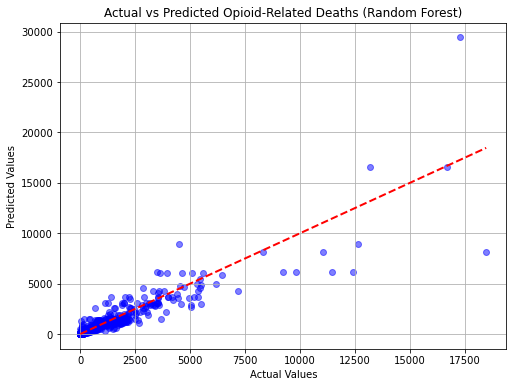

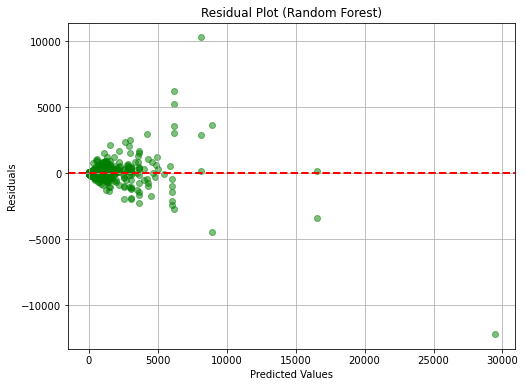

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect fit line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Opioid-Related Deaths (Random Forest)")
plt.grid(True)  # Add gridlines
plt.show()

# Residual plot for Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.grid(True)  # Add gridlines
plt.show()



In [18]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load dataset and handle errors
file_path = "SubstanceHarmsData_Final.csv"

try:
    df_dashboard = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")

    # Print first few rows and column names
    print("Dataset Preview:\n", df_dashboard.head())
    print("Available Columns:\n", df_dashboard.columns)

    # Auto-detect year column
    year_col = None
    for col in df_dashboard.columns:
        if "year" in col.lower():
            year_col = col
            break

    if year_col is None:
        raise KeyError("Year column not found in dataset!")

    # Convert detected year column to numeric
    df_dashboard[year_col] = pd.to_numeric(df_dashboard[year_col], errors='coerce')

    # Filter only 'Number' records (remove Crude Rates)
    df_dashboard = df_dashboard[df_dashboard['Unit'] == 'Number']

    # Convert Value column to numeric
    df_dashboard['Value'] = pd.to_numeric(df_dashboard['Value'], errors='coerce').fillna(0)

    # Aggregate data by Region, Year, Substance, and Source
    df_summary = df_dashboard.groupby(['Region', year_col, 'Substance', 'Source'])['Value'].sum().reset_index()

except Exception as e:
    print(f"Error loading dataset: {e}")
    df_summary = pd.DataFrame()  # Create empty dataframe if error occurs

# Create a Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Opioid & Stimulant-Related Harms in Canada (2016-2023)", style={'textAlign': 'center'}),

    # Dropdown for selecting event type (Deaths, Hospitalizations, ED Visits, EMS)
    html.Label("Select Event Type:"),
    dcc.Dropdown(
        id='source-dropdown',
        options=[{'label': src, 'value': src} for src in df_summary['Source'].unique()] if not df_summary.empty else [],
        value='Deaths',  # Default selection
        clearable=False
    ),

    # Dropdown for selecting substance (Opioids or Stimulants)
    html.Label("Select Substance:"),
    dcc.Dropdown(
        id='substance-dropdown',
        options=[{'label': sub, 'value': sub} for sub in df_summary['Substance'].unique()] if not df_summary.empty else [],
        value='Opioids',  # Default selection
        clearable=False
    ),

    # Choropleth Map for Deaths per Province
    dcc.Graph(id='map-graph'),

    # Time-series trend chart
    dcc.Graph(id='trend-graph'),

    # Animation slider for year selection
    dcc.Slider(
        id='year-slider',
        min=df_summary[year_col].min() if not df_summary.empty else 2018,
        max=df_summary[year_col].max() if not df_summary.empty else 2023,
        value=df_summary[year_col].min() if not df_summary.empty else 2018,
        marks={str(year): str(year) for year in df_summary[year_col].unique()} if not df_summary.empty else {str(y): str(y) for y in range(2018, 2024)},
        step=None
    )
])

# Callback for updating the map and trend chart
@app.callback(
    [dash.Output('map-graph', 'figure'),
     dash.Output('trend-graph', 'figure')],
    [dash.Input('source-dropdown', 'value'),
     dash.Input('substance-dropdown', 'value'),
     dash.Input('year-slider', 'value')]
)
def update_dashboard(selected_source, selected_substance, selected_year):
    if df_summary.empty:
        return {}, {}

    # Filter data for selected year, event type, and substance
    df_filtered = df_summary[
        (df_summary[year_col] == selected_year) &
        (df_summary['Source'] == selected_source) &
        (df_summary['Substance'] == selected_substance)
    ]

    # Choropleth map
    fig_map = px.choropleth(
        df_filtered,
        locations="Region",
        locationmode="country names",
        color="Value",
        hover_name="Region",
        color_continuous_scale="Reds",
        title=f"{selected_source} due to {selected_substance} in {selected_year}"
    )

    # Time-series trend chart
    df_trend = df_summary[
        (df_summary['Source'] == selected_source) &
        (df_summary['Substance'] == selected_substance)
    ]
    fig_trend = px.line(
        df_trend,
        x=year_col,
        y="Value",
        color="Region",
        title=f"Trend of {selected_source} due to {selected_substance} Over Time"
    )

    return fig_map, fig_trend

# Run the dashboard
if __name__ == '__main__':
    app.run_server(debug=True)


Dataset Loaded Successfully!
Dataset Preview:
   Substance  Source Specific_Measure                             Type_Event  \
0   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
1   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
2   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
3   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   
4   Opioids  Deaths  Overall numbers  Total apparent opioid toxicity deaths   

   Region  PRUID Time_Period Year_Quarter Aggregator Disaggregator  \
0  Canada      1     By year         2016        NaN           NaN   
1  Canada      1     By year         2017        NaN           NaN   
2  Canada      1     By year         2018        NaN           NaN   
3  Canada      1     By year         2019        NaN           NaN   
4  Canada      1     By year         2020        NaN           NaN   

         Unit  Value  
0  Crude rate    7.8  
1  Crude ra